In [41]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

In [2]:
df = pd.read_csv('turnstile_May26.txt')

Fix 'EXITS' column name (it has many spaces at the end of it)

In [4]:
# old_exit_name = df.columns[-1]
df.rename(columns={df.columns[-1]: 'EXITS'}, inplace = True)

In [5]:
backup_df = df.copy()

In [6]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME)
df['DATE'] = pd.to_datetime(df['DATE'])

In [14]:
df['STATION_KEY'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['STATION']

Compute difference between consecutive rows in the 'ENTRIES' columns

In [7]:
df['ENTRY_DIFFS'] = df['ENTRIES'].diff()

In [46]:
df.head(21)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,24.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,20.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,81.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,196.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,20:00:00,REGULAR,6626018,2245520,2018-05-19 20:00:00,227.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/20/2018,00:00:00,REGULAR,6626130,2245537,2018-05-20 00:00:00,112.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/20/2018,04:00:00,REGULAR,6626149,2245545,2018-05-20 04:00:00,19.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/20/2018,08:00:00,REGULAR,6626160,2245564,2018-05-20 08:00:00,11.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/20/2018,12:00:00,REGULAR,6626223,2245620,2018-05-20 12:00:00,63.0


Group by Station Key + Date, and sum over Entry Differences

grp1 = df.groupby(['STATION_KEY', 'DATE'])['ENTRY_DIFFS'].sum().reset_index()

In [32]:
s = grp1.loc[0, 'STATION_KEY']

In [30]:
grp1.head()

,STATION_KEY,DATE,ENTRY_DIFFS
0,A002 R051 59 ST,2018-05-19,804740.0
1,A002 R051 59 ST,2018-05-20,5969.0
2,A002 R051 59 ST,2018-05-21,12384.0
3,A002 R051 59 ST,2018-05-22,13599.0
4,A002 R051 59 ST,2018-05-23,14007.0


In [36]:
t = grp1.loc[0, 'DATE']

In [38]:
df[(df['DATE'] == t) & (df['STATION_KEY'] == s)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFFS,STATION_KEY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,NaN,A002 R051 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,24.0,A002 R051 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,20.0,A002 R051 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,81.0,A002 R051 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,196.0,A002 R051 59 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,20:00:00,REGULAR,6626018,2245520,2018-05-19 20:00:00,227.0,A002 R051 59 ST
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-05-19,00:00:00,REGULAR,5937024,1328174,2018-05-19 00:00:00,-696688.0,A002 R051 59 ST
43,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-05-19,04:00:00,REGULAR,5937035,1328178,2018-05-19 04:00:00,11.0,A002 R051 59 ST
44,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-05-19,08:00:00,REGULAR,5937043,1328187,2018-05-19 08:00:00,8.0,A002 R051 59 ST
45,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-05-19,12:00:00,REGULAR,5937100,1328224,2018-05-19 12:00:00,57.0,A002 R051 59 ST


**Need to clean up 'ENTRY_DIFFS'**

Diff between 2 different stations are meaningless

ValueError: max must be larger than min in range parameter.

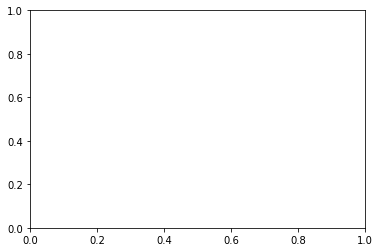

In [43]:
plt.hist(df['ENTRY_DIFFS'])